## Total_compensation_Estimation

### Importing standard  libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset 

In [2]:
df = pd.read_csv('train_set.csv')
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


here target varible(y) is Total_compensation

In [3]:
df.shape

(287836, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
Year                  287836 non-null int64
OGC                   287836 non-null int64
OG                    287836 non-null object
DC                    287836 non-null object
Dept                  287836 non-null object
UC                    287836 non-null int64
Union                 287800 non-null object
JF                    287798 non-null object
Job                   287836 non-null object
EI                    287836 non-null int64
Salaries              287836 non-null int64
Overtime              287836 non-null int64
H/D                   287836 non-null float64
YT                    287836 non-null object
Total_Compensation    287836 non-null int64
dtypes: float64(1), int64(7), object(7)
memory usage: 32.9+ MB


In [5]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


### Data Preprocessing

#### Data Imputation 

In [6]:
df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [7]:
df.isnull().sum()/len(df) * 100

Year                  0.000000
OGC                   0.000000
OG                    0.000000
DC                    0.000000
Dept                  0.000000
UC                    0.000000
Union                 0.012507
JF                    0.013202
Job                   0.000000
EI                    0.000000
Salaries              0.000000
Overtime              0.000000
H/D                   0.000000
YT                    0.000000
Total_Compensation    0.000000
dtype: float64

In [8]:
df.dropna(inplace = True)
df.isnull().any()

Year                  False
OGC                   False
OG                    False
DC                    False
Dept                  False
UC                    False
Union                 False
JF                    False
Job                   False
EI                    False
Salaries              False
Overtime              False
H/D                   False
YT                    False
Total_Compensation    False
dtype: bool

##### Deleting unnecessary columns 

In [9]:
df.nunique()

Year                       4
OGC                        7
OG                         7
DC                        54
Dept                      54
UC                       789
Union                     72
JF                        55
Job                     1133
EI                     52392
Salaries              104440
Overtime               33632
H/D                   113664
YT                         2
Total_Compensation    155957
dtype: int64

#####  we can see OGC, DC, UC, are unnecessary because we already contain OG, Dept, Union respectively, and Employee Identifier is also not necessary

In [10]:
df.drop(['OGC','DC','UC','EI'],inplace = True,axis = 1)

In [11]:
df.head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,12196,0,0.00,Calendar,16158
1,2013,Community Health,Public Health,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,74639,2820,12703.31,Fiscal,115784
2,2015,General Administration & Finance,Assessor/Recorder,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,100554,0,12424.50,Calendar,144708
3,2016,Public Protection,Police,Police Officers' Association,Police Services,Sergeant 3,140164,52754,13043.87,Fiscal,242323
4,2013,"Public Works, Transportation & Commerce",PUC Hetch Hetchy,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,58813,0,7655.28,Calendar,82106


##### removing columns with negative numbers 

In [12]:
print('Column Salaries rows with negative values ', len(df[df['Salaries']<0]))
print('Column Overtime rows with negative values ', len(df[df['Overtime']<0]))
print('Column H/D rows with negative values ', len(df[df['H/D']<0]))
print('Column Total_compensation rows with negative values ', len(df[df['Total_Compensation']<0]))



Column Salaries rows with negative values  72
Column Overtime rows with negative values  27
Column H/D rows with negative values  344
Column Total_compensation rows with negative values  214


In [13]:
index_names = df[(df['Salaries']<0) | (df['Overtime']<0) | (df['H/D']<0) | (df['Total_Compensation']<0)].index

In [14]:
len(index_names)

547

In [15]:
df.drop(index = index_names,inplace = True)

In [16]:
print('Column Salaries rows with negative values ', len(df[df['Salaries']<0]))
print('Column Overtime rows with negative values ', len(df[df['Overtime']<0]))
print('Column H/D rows with negative values ', len(df[df['H/D']<0]))
print('Column Total_compensation rows with negative values ', len(df[df['Total_Compensation']<0]))



Column Salaries rows with negative values  0
Column Overtime rows with negative values  0
Column H/D rows with negative values  0
Column Total_compensation rows with negative values  0


##### Total compensation cant be zero so lets drop those values

In [17]:
print('Column Total_compensation rows with zero values ', len(df[df['Total_Compensation']==0]))


Column Total_compensation rows with zero values  14


In [18]:
index_names = df[df['Total_Compensation']==0].index

In [19]:
df.drop(index_names,inplace = True)

In [20]:
print('Column Total_compensation rows with zero values ', len(df[df['Total_Compensation']==0]))


Column Total_compensation rows with zero values  0


In [21]:
df.head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,12196,0,0.00,Calendar,16158
1,2013,Community Health,Public Health,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,74639,2820,12703.31,Fiscal,115784
2,2015,General Administration & Finance,Assessor/Recorder,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,100554,0,12424.50,Calendar,144708
3,2016,Public Protection,Police,Police Officers' Association,Police Services,Sergeant 3,140164,52754,13043.87,Fiscal,242323
4,2013,"Public Works, Transportation & Commerce",PUC Hetch Hetchy,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,58813,0,7655.28,Calendar,82106


(5.0, 0.0)

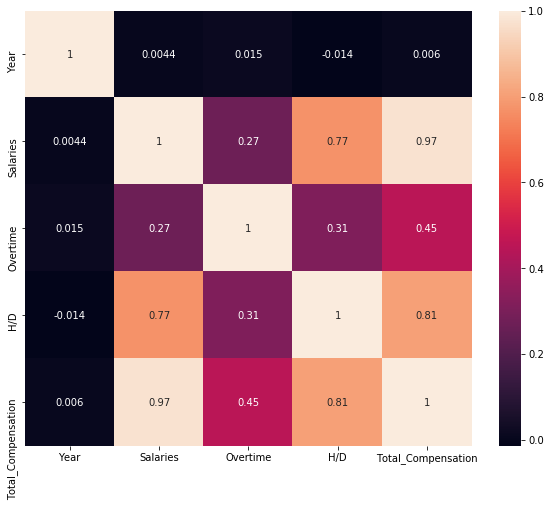

In [22]:
plt.figure(figsize = (10,8))
ax =sns.heatmap(df.corr(),annot = True)
b,t = ax.get_ylim()
ax.set_ylim(b+0.5,t-0.5)

#### Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287237 entries, 0 to 287835
Data columns (total 11 columns):
Year                  287237 non-null int64
OG                    287237 non-null object
Dept                  287237 non-null object
Union                 287237 non-null object
JF                    287237 non-null object
Job                   287237 non-null object
Salaries              287237 non-null int64
Overtime              287237 non-null int64
H/D                   287237 non-null float64
YT                    287237 non-null object
Total_Compensation    287237 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 26.3+ MB


#####  Year is a int column so we need to convert to string

In [25]:
df['Year'] = df['Year'].apply(lambda x : str(x))

In [26]:
type(df['Year'][0])

str

In [27]:
data_ohe = pd.get_dummies(df[['Year','OG','YT']])
data_ohe.head()

,Year_2013,Year_2014,Year_2015,Year_2016,OG_Community Health,OG_Culture & Recreation,OG_General Administration & Finance,OG_General City Responsibilities,OG_Human Welfare & Neighborhood Development,OG_Public Protection,"OG_Public Works, Transportation & Commerce",YT_Calendar,YT_Fiscal
0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1,1,0


In [28]:
df.columns

Index(['Year', 'OG', 'Dept', 'Union', 'JF', 'Job', 'Salaries', 'Overtime',
       'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [29]:
df[['Dept','Union','JF','Job']] = df[['Dept','Union','JF','Job']].apply(le.fit_transform)

In [30]:
df = pd.concat([data_ohe,df],axis = 1)

In [31]:
df.head()

,Year_2013,Year_2014,Year_2015,Year_2016,OG_Community Health,OG_Culture & Recreation,OG_General Administration & Finance,OG_General City Responsibilities,OG_Human Welfare & Neighborhood Development,OG_Public Protection,...,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
0,0,0,1,0,1,0,0,0,0,0,...,Community Health,45,56,28,669,12196,0,0.00,Calendar,16158
1,1,0,0,0,1,0,0,0,0,0,...,Community Health,45,62,23,1008,74639,2820,12703.31,Fiscal,115784
2,0,0,1,0,0,0,1,0,0,0,...,General Administration & Finance,5,51,6,908,100554,0,12424.50,Calendar,144708
3,0,0,0,1,0,0,0,0,0,1,...,Public Protection,42,46,35,922,140164,52754,13043.87,Fiscal,242323
4,1,0,0,0,0,0,0,0,0,0,...,"Public Works, Transportation & Commerce",38,51,22,495,58813,0,7655.28,Calendar,82106


In [32]:
df['Job'].nunique()

1132

so lets drop this Job column along with OG, year,YT

In [33]:
df.drop(['OG','Year','YT','Job'],inplace = True,axis =1 )

In [34]:
df.head()

,Year_2013,Year_2014,Year_2015,Year_2016,OG_Community Health,OG_Culture & Recreation,OG_General Administration & Finance,OG_General City Responsibilities,OG_Human Welfare & Neighborhood Development,OG_Public Protection,"OG_Public Works, Transportation & Commerce",YT_Calendar,YT_Fiscal,Dept,Union,JF,Salaries,Overtime,H/D,Total_Compensation
0,0,0,1,0,1,0,0,0,0,0,0,1,0,45,56,28,12196,0,0.00,16158
1,1,0,0,0,1,0,0,0,0,0,0,0,1,45,62,23,74639,2820,12703.31,115784
2,0,0,1,0,0,0,1,0,0,0,0,1,0,5,51,6,100554,0,12424.50,144708
3,0,0,0,1,0,0,0,0,0,1,0,0,1,42,46,35,140164,52754,13043.87,242323
4,1,0,0,0,0,0,0,0,0,0,1,1,0,38,51,22,58813,0,7655.28,82106


#### Feature Scaling is not necessary as target column is directly connected with salaries, overtime,h/d columns 

### Seperating X and y 

In [35]:
X = df.drop('Total_Compensation',axis = 1)
y = df['Total_Compensation']

In [36]:
print(X.shape)
print(y.shape)

(287237, 19)
(287237,)


### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215427, 19)
(215427,)
(71810, 19)
(71810,)


### Fitting ML model

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predictions and evaluations 

In [41]:
y_pred = lr.predict(X_test)
y_pred

array([ 67532.19256037, 137781.60172735, 115074.35485728, ...,
       194391.51801644, 131460.48869817,  76851.55352981])

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_pred,y_test)

0.9867001683742974

####  Our model has an accuracy of 98%

In [44]:
lr.score(X_train,y_train)

0.9878673592834373